# Специализация "Машинное обучение и анализ данных"
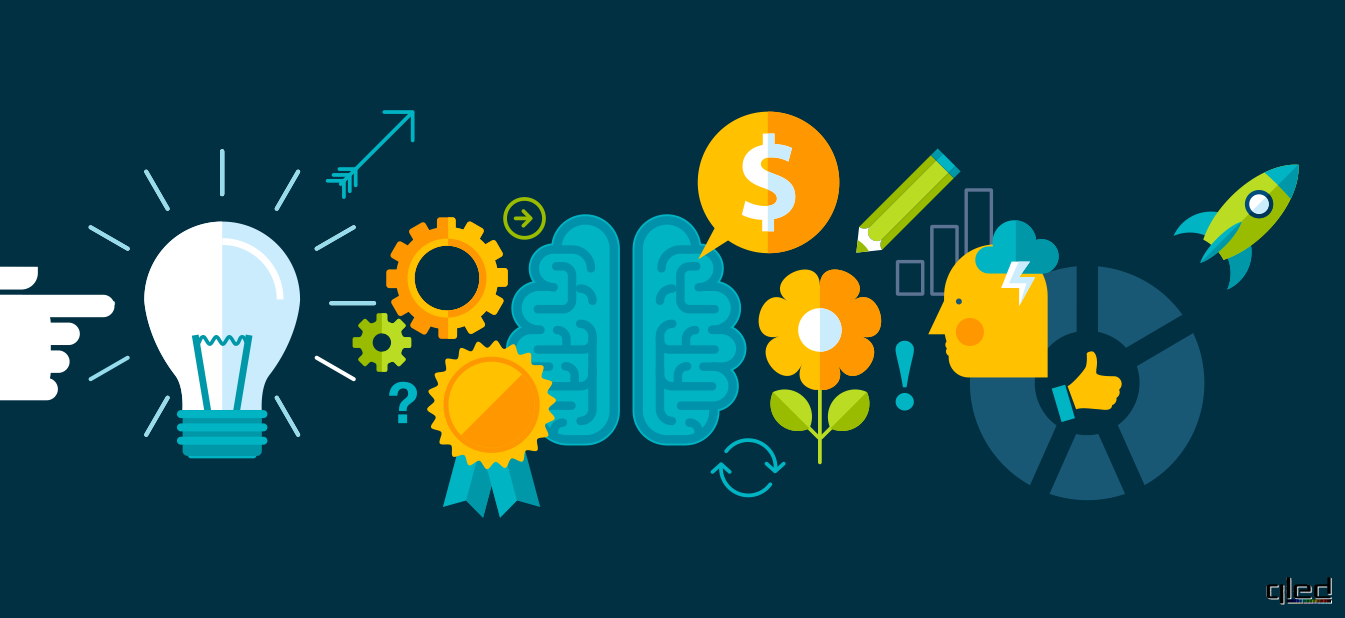

## Решение задачи "Идентификация интернет-пользователей"

### Содержание работы:

1. Цели и задачи проекта, описание исходных и обработанных данных и признаков.
2. Первичный анализ признаков и их визуализация, предобработка данных.
3. Кросс-валидация, построение кривых валидации и обучения
4. Оценка модели с описанием выбранной метрики.
5. Выводы.

## 1. Цели и задачи проекта.

Целью проекта является 
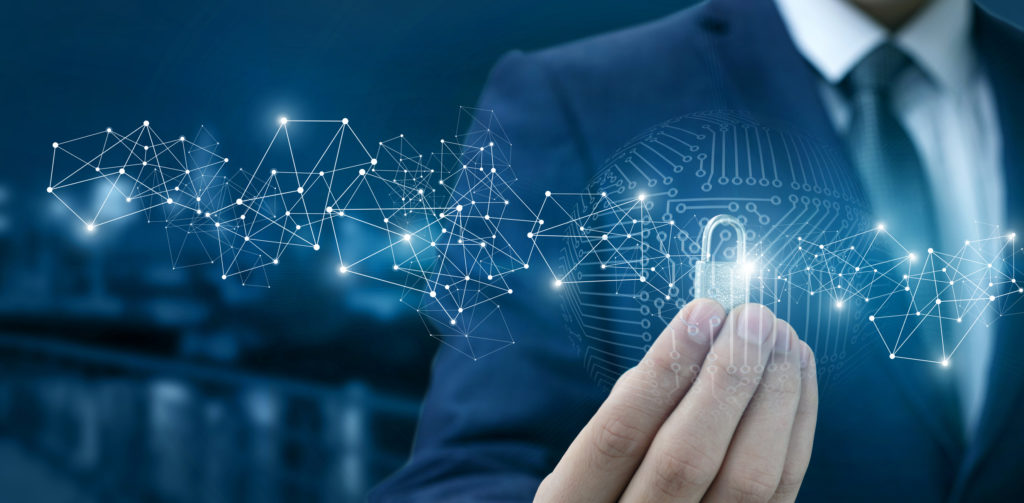

## Считывание данных и создание новых признаков

In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import collections
from datetime import datetime
from scipy.sparse import csr_matrix
from scipy import stats
from scipy import sparse

In [2]:
PATH_TO_DATA = 'C:/Users/Gregory/Machine learning/6_finile_project/capstone_user_identification/'
csv_data_train = pd.read_csv(os.path.join(PATH_TO_DATA,'train_sessions_400users.csv'),index_col='session_id')
csv_data_test = pd.read_csv(os.path.join(PATH_TO_DATA,'test_sessions_400users.csv'),index_col='session_id')

Обучающая выборка.

In [3]:
csv_data_train.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,user_id
session_id,,,,,,,,,,,,,,,,,,,,,
1,23713,2014-03-24 15:22:40,23720.0,2014-03-24 15:22:48,23713.0,2014-03-24 15:22:48,23713.0,2014-03-24 15:22:54,23720.0,2014-03-24 15:22:54,...,2014-03-24 15:22:55,23713.0,2014-03-24 15:23:01,23713.0,2014-03-24 15:23:03,23713.0,2014-03-24 15:23:04,23713.0,2014-03-24 15:23:05,653
2,8726,2014-04-17 14:25:58,8725.0,2014-04-17 14:25:59,665.0,2014-04-17 14:25:59,8727.0,2014-04-17 14:25:59,45.0,2014-04-17 14:25:59,...,2014-04-17 14:26:01,45.0,2014-04-17 14:26:01,5320.0,2014-04-17 14:26:18,5320.0,2014-04-17 14:26:47,5320.0,2014-04-17 14:26:48,198
3,303,2014-03-21 10:12:24,19.0,2014-03-21 10:12:36,303.0,2014-03-21 10:12:54,303.0,2014-03-21 10:13:01,303.0,2014-03-21 10:13:24,...,2014-03-21 10:13:36,303.0,2014-03-21 10:13:54,309.0,2014-03-21 10:14:01,303.0,2014-03-21 10:14:06,303.0,2014-03-21 10:14:24,34
4,1359,2013-12-13 09:52:28,925.0,2013-12-13 09:54:34,1240.0,2013-12-13 09:54:34,1360.0,2013-12-13 09:54:34,1344.0,2013-12-13 09:54:34,...,2013-12-13 09:54:34,1346.0,2013-12-13 09:54:34,1345.0,2013-12-13 09:54:34,1344.0,2013-12-13 09:58:19,1345.0,2013-12-13 09:58:19,601
5,11,2013-11-26 12:35:29,85.0,2013-11-26 12:35:31,52.0,2013-11-26 12:35:31,85.0,2013-11-26 12:35:32,11.0,2013-11-26 12:35:32,...,2013-11-26 12:35:32,11.0,2013-11-26 12:37:03,85.0,2013-11-26 12:37:03,10.0,2013-11-26 12:37:03,85.0,2013-11-26 12:37:04,273


In [4]:
csv_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182793 entries, 1 to 182793
Data columns (total 21 columns):
site1      182793 non-null int64
time1      182793 non-null object
site2      181175 non-null float64
time2      181175 non-null object
site3      179441 non-null float64
time3      179441 non-null object
site4      178054 non-null float64
time4      178054 non-null object
site5      176653 non-null float64
time5      176653 non-null object
site6      175268 non-null float64
time6      175268 non-null object
site7      173960 non-null float64
time7      173960 non-null object
site8      172738 non-null float64
time8      172738 non-null object
site9      171437 non-null float64
time9      171437 non-null object
site10     170247 non-null float64
time10     170247 non-null object
user_id    182793 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 30.7+ MB


Тестовая выборка.

In [5]:
csv_data_test.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,9,2014-10-04 12:24:43,304.0,2014-10-04 12:25:34,308.0,2014-10-04 12:28:33,307.0,2014-10-04 12:28:33,91.0,2014-10-04 12:28:33,308.0,2014-10-04 12:28:34,312.0,2014-10-04 12:30:31,300.0,2014-10-04 12:31:30,305.0,2014-10-04 12:32:31,309.0,2014-10-04 12:34:31
2,838,2014-12-02 09:20:37,504.0,2014-12-02 09:20:38,68.0,2014-12-02 09:20:38,11.0,2014-12-02 09:20:38,838.0,2014-12-02 09:20:38,11.0,2014-12-02 09:20:40,838.0,2014-12-02 09:20:41,886.0,2014-12-02 09:20:42,27.0,2014-12-02 09:20:42,305.0,2014-12-02 09:20:42
3,190,2014-10-01 09:27:38,192.0,2014-10-01 09:27:38,8.0,2014-10-01 09:27:38,189.0,2014-10-01 09:27:38,191.0,2014-10-01 09:27:39,189.0,2014-10-01 09:27:39,190.0,2014-10-01 09:27:39,2375.0,2014-10-01 09:27:39,192.0,2014-10-01 09:27:39,8.0,2014-10-01 09:27:39
4,295,2014-10-02 14:34:17,295.0,2014-10-02 14:34:18,295.0,2014-10-02 14:34:19,295.0,2014-10-02 14:34:20,295.0,2014-10-02 14:34:21,295.0,2014-10-02 14:34:22,295.0,2014-10-02 14:34:23,295.0,2014-10-02 14:34:24,295.0,2014-10-02 14:34:25,295.0,2014-10-02 14:34:26
5,31,2014-05-19 17:50:21,3177.0,2014-05-19 17:50:21,3174.0,2014-05-19 17:50:21,32434.0,2014-05-19 17:50:22,27.0,2014-05-19 17:50:22,31.0,2014-05-19 17:50:22,5698.0,2014-05-19 17:50:25,5698.0,2014-05-19 17:50:26,5698.0,2014-05-19 17:50:27,4173.0,2014-05-19 17:50:27


In [6]:
csv_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182793 entries, 1 to 182793
Data columns (total 21 columns):
site1      182793 non-null int64
time1      182793 non-null object
site2      181175 non-null float64
time2      181175 non-null object
site3      179441 non-null float64
time3      179441 non-null object
site4      178054 non-null float64
time4      178054 non-null object
site5      176653 non-null float64
time5      176653 non-null object
site6      175268 non-null float64
time6      175268 non-null object
site7      173960 non-null float64
time7      173960 non-null object
site8      172738 non-null float64
time8      172738 non-null object
site9      171437 non-null float64
time9      171437 non-null object
site10     170247 non-null float64
time10     170247 non-null object
user_id    182793 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 30.7+ MB


В таком виде данные не представляют какой либо пользы для нас, так как если представить сессии отдельными векторами, над ними нельзя выполнять математические операции. Для того чтобы интерпритировать информацию в виде доступном для обучения алгоритмов, представим сессии как "мешок сайтов". 

Вынесем список ответов обучающей выборки в отдельный вектор, и, объединив обучающую и тестовые выборки, переведем их в формат sparce.

In [7]:
#функция перевода данных в разреженный формат
def to_sparse(data):
    cols = data.shape[1]
    values = data.values
    flat = values.flatten()
    nvalues = ([1]*flat.shape[0], flat, range(0, flat.shape[0]+10, 10))
    sparse = csr_matrix(nvalues)[:, 1:]
    return sparse

In [8]:
train = csv_data_train[[u'site%d' % i for i in range(1, 11)]].fillna(0).astype(int)
test = csv_data_test[[u'site%d' % i for i in range(1, 11)]].fillna(0).astype(int)

In [9]:
idx_split = csv_data_train.shape[0]
train_test_data = pd.concat([train,test])
train_test_sparse = to_sparse(train_test_data)
X_train_sparse = train_test_sparse[:idx_split, :]
X_test_sparse = train_test_sparse[idx_split:, :]
y = csv_data_train.user_id.values

Кроме сайтов, посещенных пользователем, определить конкретного пользователя можно и по другим признакам. Это могут быть как признаки основывабщиеся на времени посещения сайтов, так и производные от самих сайтов.

Предлагаемые признаки:

1. Разница по времени между посещениями сайтов.
2. Длина сессии по времени.
3. День недели в который была проведена сессия.
4. Время начала сессии в течение дня.
5. Количество уникальных сайтов.
6. Частота использования почты. 
7. Время, которое пользователь проводит в соцсетях.
8. Отношение количества уникальных сайтов к популярным сайтам.

Запишем функцию для получения данных признаков, после чего рзделим их по перечисленным выше категориям.

In [10]:
#функция дополнительных признаков 
# Функция принимает датафрэйм, и путь к словарю.
# функция возвращает датафрэйм новых признаков.

def create_new_feauters(data,path_to_dict):
    data_columns = ['time_delta_%d' % i for i in range(1,10)] + ['max_delta'] + ['day%d' % i for i in range(1,8)] + ['day','hour','month','unique','mail_fr','social','popular_sites']
    
    day1_month = {1:2,2:5,3:5,4:1,5:3,6:6,
                  7:1,8:4,9:0,10:2,11:5,12:0,
                  14:0,16:3,18:6,20:1,22:4,24:6}
    year = {2014:1,2013:2}
    
    with open(path_to_dict, 'rb') as f:
        train_dict = pickle.load(f)
        
    helper_adv = train_dict.keys()

    soc_keys_words = ['facebook','youtube','qq','qzone',
                'whatsapp','wechat','skype','instagram',
                'twitter','tumbler','viber','vkontakte',
                'snapchat','linkedln','wechat','pinterest',
                'flickr','weibo','meetup','myspace',
                'tagworld','hi5','bebo','orkut',
                'popist','tribe','imbee','dogster','boompa']
    soc_list = []
    for val in helper_adv[1:]:
        for key in soc_keys_words:
            if val.find(key)>0:
                soc_list.append(train_dict[val])
                
    mail_keys_words = ['mail','outlook','inbox','tutanota']
    
    mail_list = []
    
    for val in helper_adv[1:]:
        for key in mail_keys_words:
            if val.find(key)>0:
                mail_list.append(train_dict[val])
                  
    data_site = data[[u'site%d' % i for i in range(1, 11)]].fillna(0).astype(int)
    
    for_C = data_site.values.reshape((1,data_site.shape[0]*data_site.shape[1]))
    C = collections.Counter(list(for_C[0]))
    pop_list = C.keys()[:40]
    
    data_time = data[[u'time%d' % i for i in range(1, 11)]].fillna(method = 'pad',axis = 1)

#_____________________________________________________________________________________________

#_______Перевод_из_даты_в_числа_и_вычитание_столбцов_друг_из_друга._На_выходе_10_столбцов______
    X = pd.concat([pd.to_datetime(data_time['time'+str(i)]) for i in range(1,11)],axis = 1)
    date_list = X.time1 
    X = X.apply(pd.to_numeric)
    X1 = X[['time'+str(i) for i in range(2,11)]].values
    X2 = X[['time'+str(i) for i in range(1,10)]].values
    diff1 = np.absolute(X1-X2)/100000000

    diff2 = X1[:,8]-X2[:,0]
    ans_time = np.hstack((np.absolute(X2/1000000000-X1/1000000000),diff2.reshape((len(X1),1))/1000000000))
   
    #print (ans_time[:10,:])
#_______пробеаться по индексам датафреймов и записывать в массив данные
    ans_list = []
    for i in range(0,data_site.shape[0]):
        unique = len(data_site.iloc[i].unique())
        day = (date_list[i+1].day + day1_month[date_list[i+1].month*year[date_list[i+1].year]])%7
        day_list = np.zeros(7)
        day_list[day] = 1
        time = date_list[i+1].hour
        mail = len(list(set(data_site.iloc[i])&set(mail_list)))
        soc = len(list(set(data_site.iloc[i])&set(soc_list)))
        pop = len(list(set(data_site.iloc[i])&set(pop_list)))
        month = date_list[i+1].month
        ans_list.append(np.hstack((day_list,day,time,month,unique,mail,soc,pop)))      
    ans = np.vstack(ans_list)
    data_ans = pd.DataFrame(np.hstack((ans_time,ans)),columns = data_columns )
    return data_ans  

In [11]:
%%time
add_feauters = create_new_feauters(csv_data_train,os.path.join(PATH_TO_DATA,'site_dic.pkl'))

Wall time: 1min 37s


In [12]:
add_feauters.head(10)

,time_delta_1,time_delta_2,time_delta_3,time_delta_4,time_delta_5,time_delta_6,time_delta_7,time_delta_8,time_delta_9,max_delta,...,day5,day6,day7,day,hour,month,unique,mail_fr,social,popular_sites
0,8.0,0.0,6.0,0.0,1.0,6.0,2.0,1.0,1.0,25.0,...,0.0,0.0,0.0,1.0,15.0,3.0,2.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,2.0,0.0,17.0,29.0,1.0,50.0,...,1.0,0.0,0.0,4.0,14.0,4.0,6.0,0.0,0.0,0.0
2,12.0,18.0,7.0,23.0,12.0,18.0,7.0,5.0,18.0,120.0,...,0.0,1.0,0.0,5.0,10.0,3.0,3.0,0.0,1.0,1.0
3,126.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0,0.0,351.0,...,0.0,1.0,0.0,5.0,9.0,12.0,7.0,0.0,0.0,0.0
4,2.0,0.0,1.0,0.0,0.0,91.0,0.0,0.0,1.0,95.0,...,0.0,0.0,0.0,2.0,12.0,11.0,4.0,0.0,0.0,2.0
5,1.0,0.0,8.0,1.0,16.0,10.0,12.0,0.0,0.0,48.0,...,0.0,1.0,0.0,5.0,14.0,1.0,8.0,0.0,0.0,0.0
6,1.0,1.0,1.0,2.0,1.0,2.0,4.0,0.0,2.0,14.0,...,0.0,0.0,0.0,3.0,14.0,11.0,2.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,6.0,8.0,2.0,3.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,6.0,13.0,11.0,10.0,0.0,5.0,5.0
9,3.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,14.0,...,0.0,0.0,0.0,0.0,13.0,3.0,1.0,0.0,0.0,0.0


## 2.Анализ получившихся признаков

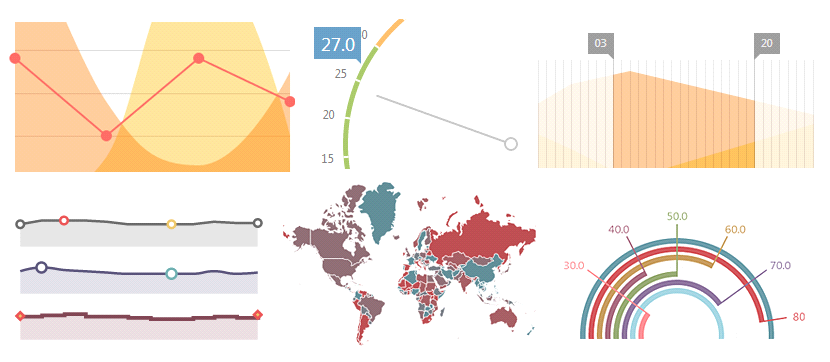

В этом разделе проводится анализ признаков, полученых ранее. В первую очередь необходимо убедиться в возможности разделить пользователей с помощью данных разреженной матрицы и сравнить результаты этой же операции с добавлением новых признаков. Однако не все признаки могут оказаться полезными при решении задачи классификации. Исходя из этих условий будут решаться следующие задачи:

1. Отображение разреженной матрицы в двумерное пространство и отрисовка полученных графиков.
2. Проверка гипотез о различии выборочных средних у признаков разных пользователей.
3. Визуализация полученных признаков.
3. Отбор признаков на основе предыдущих пунктов.
4. Отображение в двумерном пространстве признаков, полученных в предыдущих пунктах.

### Отображение признаков в двумерном пространстве

Для более эффективной оценки, отберем для визуализации 20 пользователей.

In [13]:
unique = np.unique(y)
targets = unique[0:20]
ind_target = []
for val in targets:
    ind_target.extend(np.where(y==val))

ind_target = np.hstack(ind_target)
y_plt = y[ind_target]
lab = np.unique(y_plt)

In [14]:
from sklearn import random_projection
import matplotlib.pyplot as plt

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
colors = {1:'red',5:'sienna',6:'navy',7:'darkcyan',8:'mediumpurple',
          9:'plum',10:'g',13:'c',16:'skyblue',19:'crimson',
          25:'coral',26:'chocolate',27:'darkred',29:'khaki',30:'dimgrey',
          34:'pink',36:'teal',39:'lime',41:'oldlace',42:'black'}

In [18]:
from sklearn import manifold

In [19]:
tsne_1 = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne_1 = tsne_1.fit_transform(X_train_sparse[ind_target,:].toarray())

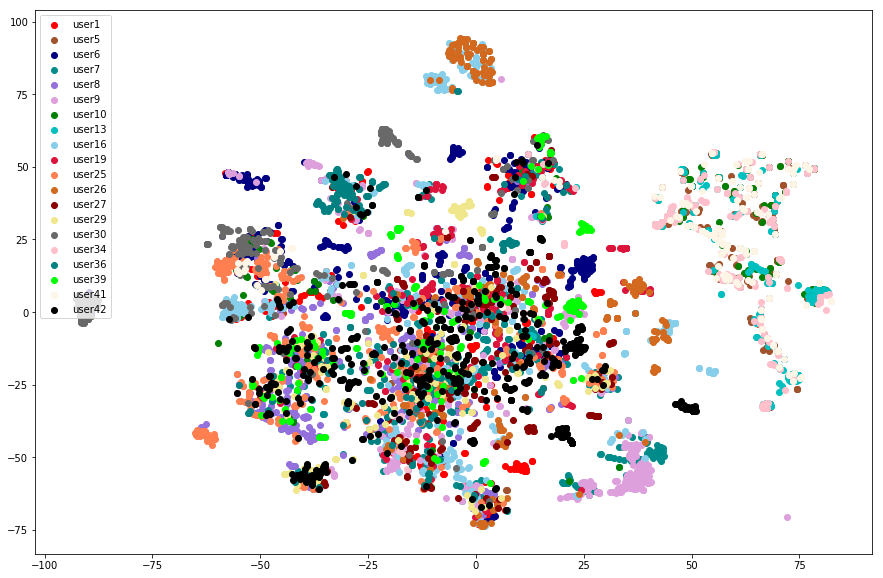

In [26]:
pylab.figure(figsize=(15, 10))
col = 0
for i in lab:
    col +=1
    z = np.ones((len(y_plt[y_plt == i]),))*100
    pylab.scatter(data_2d_tsne_1[y_plt == i, 0], data_2d_tsne_1[y_plt == i, 1], c = colors[i],label = ('user'+str(i)))
    pylab.legend()


Выводы: Большинство меток при переходе к двумерной плоскости практически неразделимы, что говорит о плохом качестве классификации с такими признаками. Поэтому необходимо отобрать дополнительные признаки для улучшения работы алгоритмов.

## Визуализация и анализ дополнительных признаков

Для определения полезных признаков предлагается сравнить их основные параметры между собой. Так как сравнивать 20 пользователей между собой является довольно сложной задачей, то воспользуемся способом "один против всех". Для этого один пользователь относится к классу "1", а остальные 19 к классу "0", операция повторяется 3 раза с разными пользователями для достоверности результата.

Также, некоторые признаки можно сравнить визуально, построив гистограммы для каждого из пользователей. 

In [20]:
unique = np.unique(y)
targets = unique[10:14]
ind_target_2 = []
for val in targets:
    ind_target_2.extend(np.where(y==val))
ind_target_2 = np.hstack(ind_target_2)
user_f = pd.DataFrame({'user':y})
#data_visualisation = pd.concat([add_feauters,user_f],axis = 0,sort=False).iloc[ind_target_2]
data_visualisation = add_feauters.join(user_f).iloc[ind_target_2]

In [21]:
data_visualisation.head(10)

,time_delta_1,time_delta_2,time_delta_3,time_delta_4,time_delta_5,time_delta_6,time_delta_7,time_delta_8,time_delta_9,max_delta,...,day6,day7,day,hour,month,unique,mail_fr,social,popular_sites,user
194,18.0,0.0,40.0,80.0,0.0,32.0,0.0,1.0,31.0,202.0,...,0.0,0.0,0.0,14.0,11.0,7.0,0.0,0.0,0.0,25
384,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,0.0,4.0,23.0,11.0,7.0,0.0,5.0,6.0,25
802,0.0,8.0,0.0,1.0,11.0,7.0,220.0,95.0,889.0,1231.0,...,1.0,0.0,5.0,22.0,11.0,8.0,0.0,0.0,2.0,25
1535,9.0,0.0,1.0,6.0,1.0,2.0,3.0,2.0,0.0,24.0,...,0.0,0.0,4.0,22.0,11.0,3.0,0.0,0.0,0.0,25
1906,1.0,154.0,18.0,0.0,57.0,0.0,0.0,9.0,3.0,242.0,...,0.0,0.0,1.0,20.0,8.0,9.0,0.0,0.0,3.0,25
2090,1.0,16.0,102.0,50.0,14.0,0.0,4.0,1.0,1.0,189.0,...,0.0,0.0,3.0,22.0,1.0,8.0,0.0,1.0,2.0,25
2337,4.0,28.0,10.0,128.0,30.0,11.0,0.0,0.0,18.0,229.0,...,0.0,0.0,2.0,8.0,12.0,9.0,0.0,0.0,3.0,25
2836,14.0,10.0,5.0,436.0,2.0,122.0,18.0,238.0,27.0,872.0,...,0.0,0.0,1.0,16.0,11.0,6.0,0.0,1.0,3.0,25
3086,1.0,0.0,7.0,0.0,0.0,1.0,1.0,2.0,28.0,40.0,...,0.0,0.0,0.0,14.0,11.0,8.0,0.0,4.0,4.0,25
3333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,2.0,9.0,11.0,6.0,0.0,3.0,3.0,25


In [22]:
import seaborn as sns

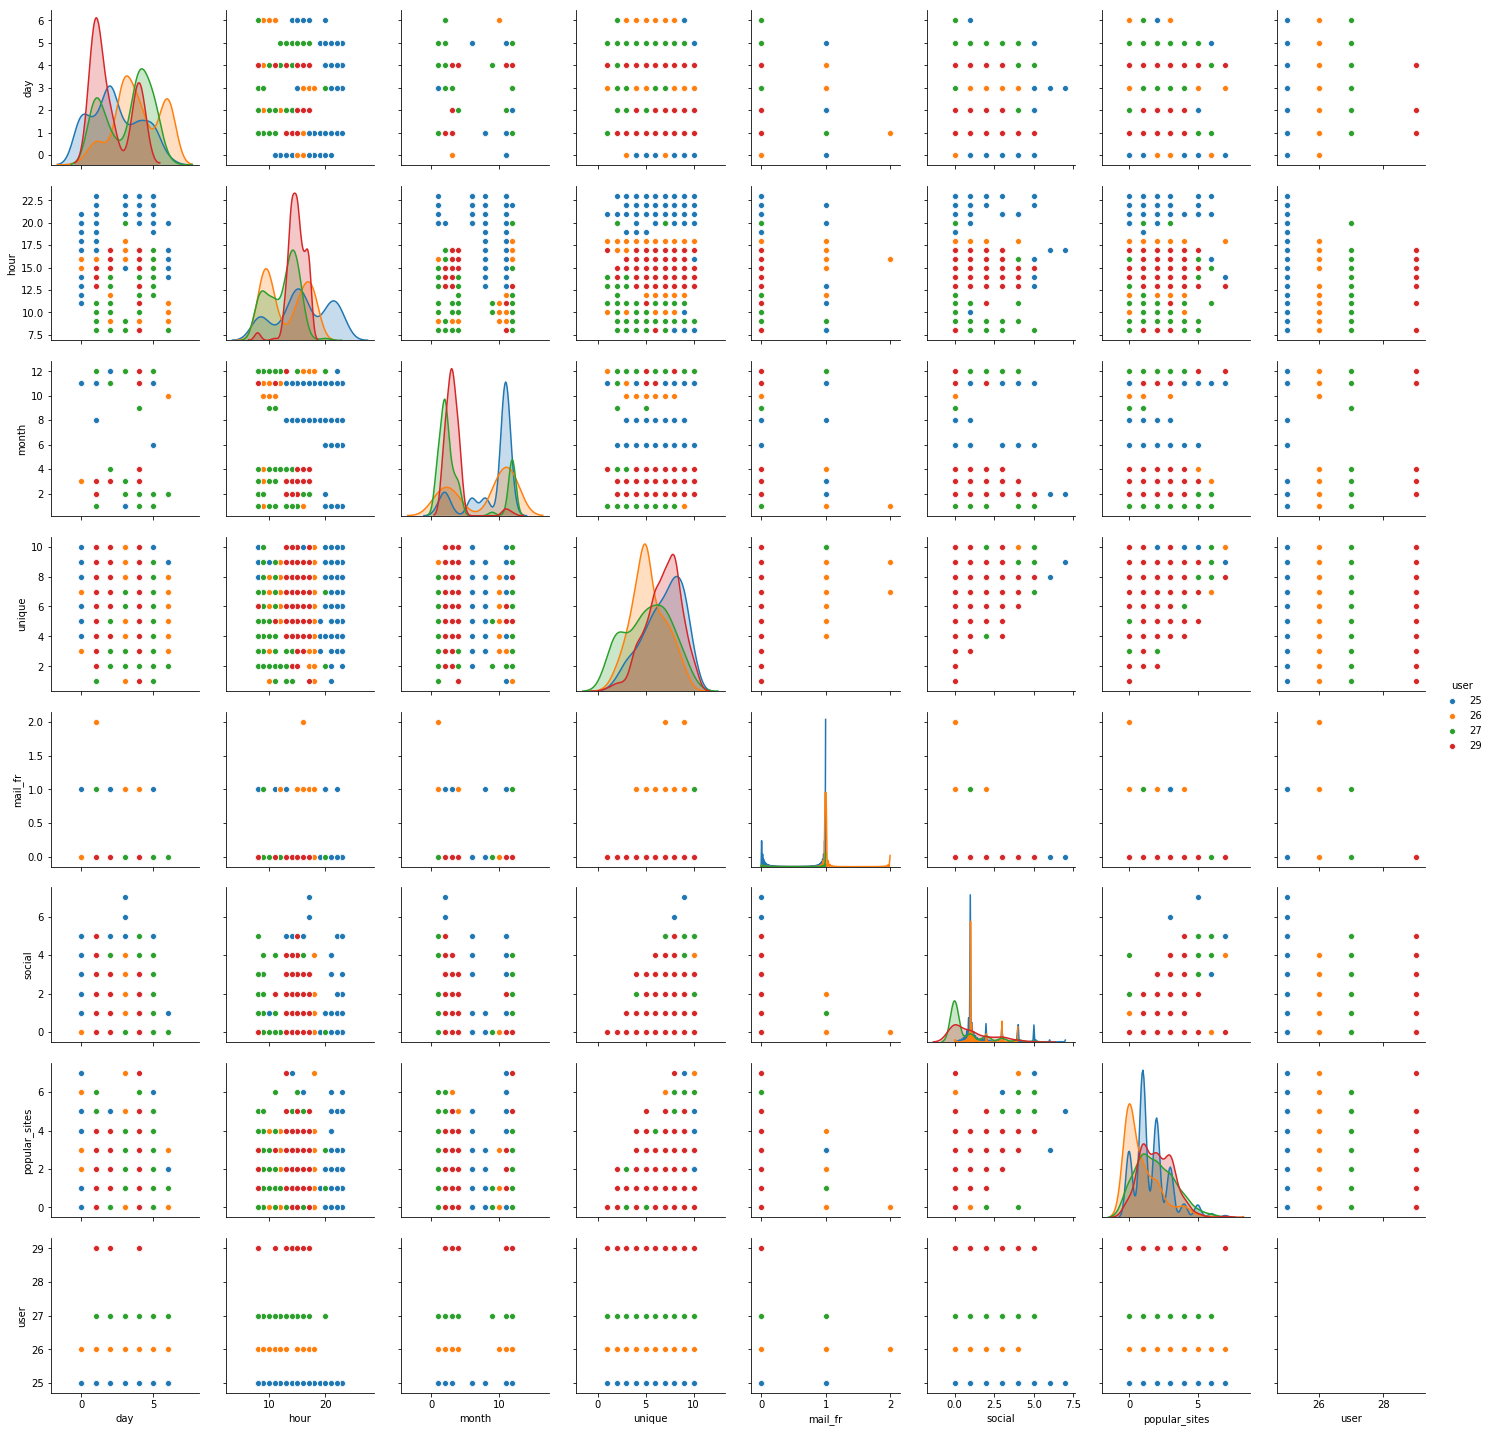

In [24]:
sns.pairplot(data_visualisation[['day','hour','month','unique','mail_fr','social','popular_sites','user']], hue = 'user');

#### Анализ корреляции признаков с целевой переменной.

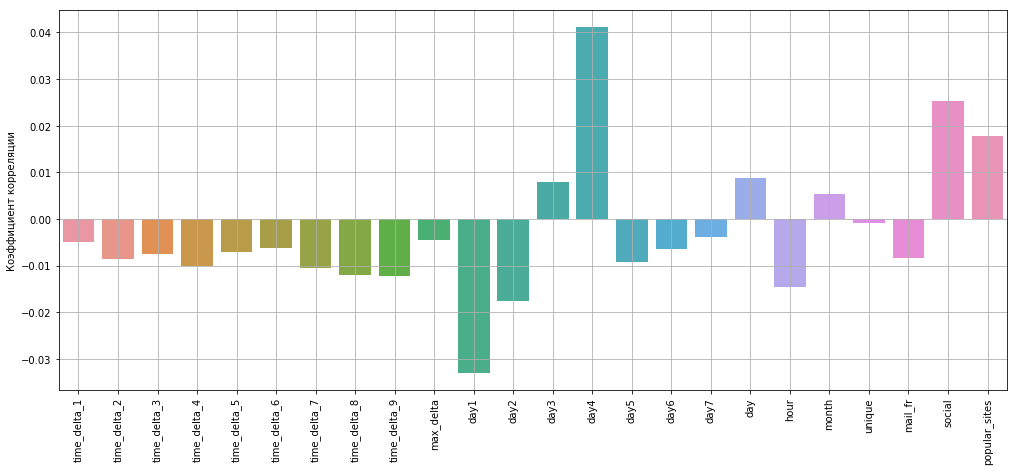

In [25]:
pylab.figure(figsize = (17,7))
add_feauter_corr = add_feauters.join(pd.DataFrame({'user':y}))
for_plot = add_feauter_corr.corr(method = 'spearman').user
sns.barplot(add_feauter_corr.columns[:-1],for_plot[:-1])
plt.xticks(np.arange(len(for_plot.drop('user'))),rotation='vertical');
pylab.ylabel(u'Коэффициент корреляции')
pylab.grid()

Выводы:

1. Наименьшей корреляцией с меткой пользоватея имеют признаки: unique,month,mail_fr.
2. Также относитеьно низкими показатеями коэффициента корреяции обладают признаки отвечающие за время посещения сайтов (time_delta).
3. Наибольшими коэффицентами корреляции обладают признаки отвечающие за день недели и час, а также количество посещенных социальных сетей и количество популярных сайтов.

#### 1. День недели

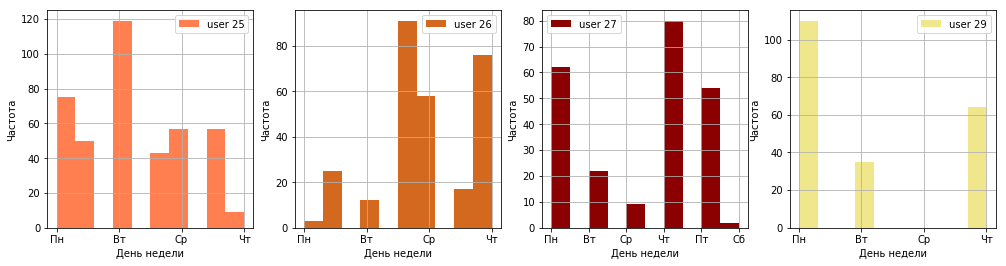

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['day'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'День недели')
    plot.set_ylabel(u'Частота')
    plot.set_xticklabels([0,u'Пн', u'Вт', u'Ср', u'Чт', u'Пт', u'Сб', u'Вс'])
    plot.grid()
    plot.legend()

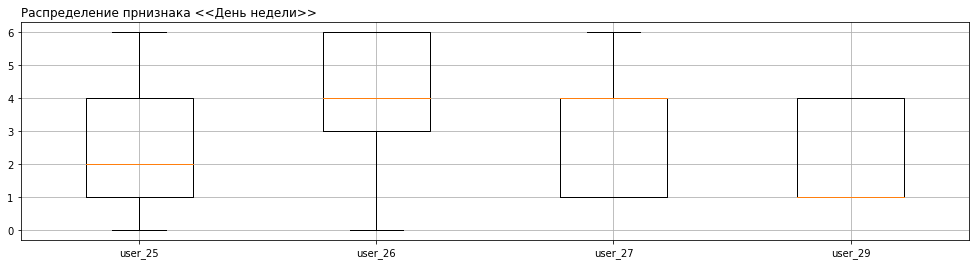

In [27]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'day'],data_visualisation.loc[data_visualisation.user == 26,'day'],
               data_visualisation.loc[data_visualisation.user == 27,'day'],data_visualisation.loc[data_visualisation.user == 29,'day']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<День недели>>', loc = 'left')
pylab.grid()

#### 2. Kоличество посещений соц-сетей.

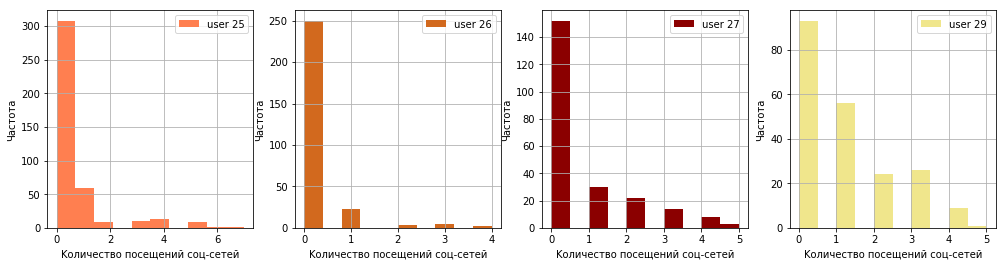

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['social'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'Kоличество посещений соц-сетей')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

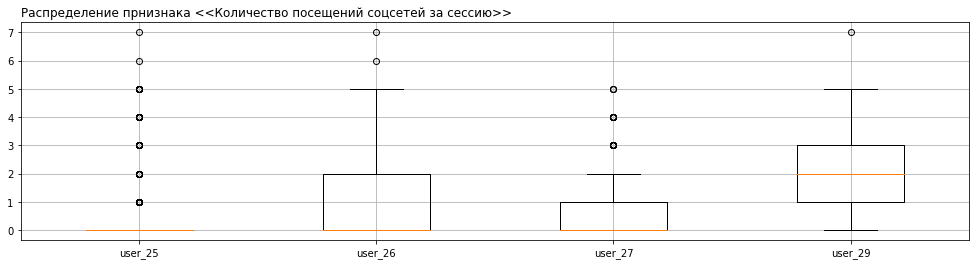

In [29]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'social'],data_visualisation.loc[data_visualisation.user == 26,'popular_sites'],
               data_visualisation.loc[data_visualisation.user == 27,'social'],data_visualisation.loc[data_visualisation.user == 29,'popular_sites']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Количество поcещений соцсетей за сессию>>', loc = 'left')
pylab.grid()

#### 3. Месяц

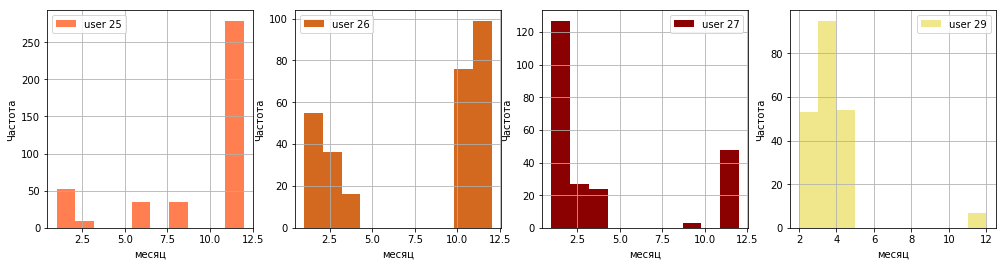

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['month'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'месяц')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

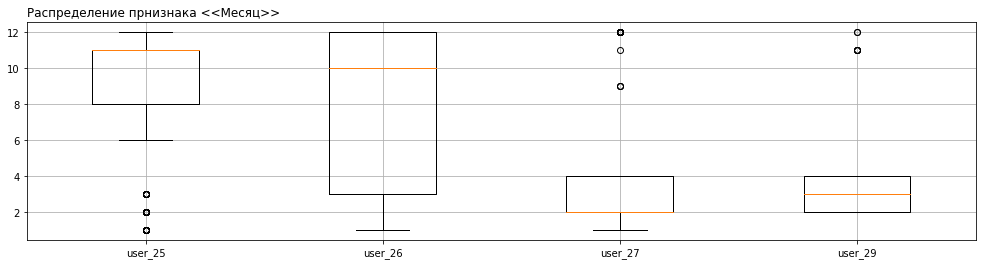

In [31]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'month'],data_visualisation.loc[data_visualisation.user == 26,'month'],
               data_visualisation.loc[data_visualisation.user == 27,'month'],data_visualisation.loc[data_visualisation.user == 29,'month']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Месяц>>', loc = 'left')
pylab.grid()

#### 4.Kоличество популярных сайтов в сессии

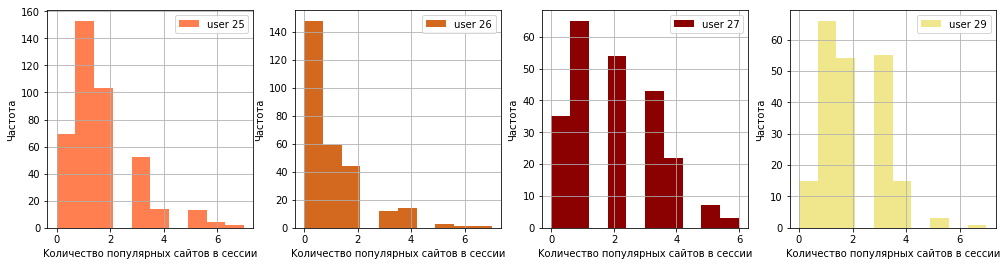

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['popular_sites'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'Kоличество популярных сайтов в сессии')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

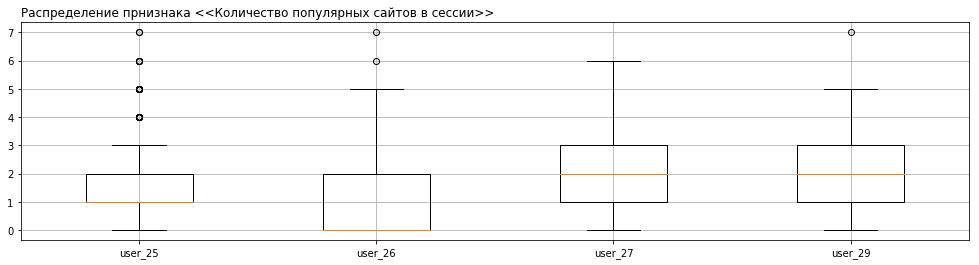

In [33]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'popular_sites'],data_visualisation.loc[data_visualisation.user == 26,'popular_sites'],
               data_visualisation.loc[data_visualisation.user == 27,'popular_sites'],data_visualisation.loc[data_visualisation.user == 29,'popular_sites']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Количество популярных сайтов в сессии>>', loc = 'left')
pylab.grid()

#### 5. Количество уникальных сайтов в сессии

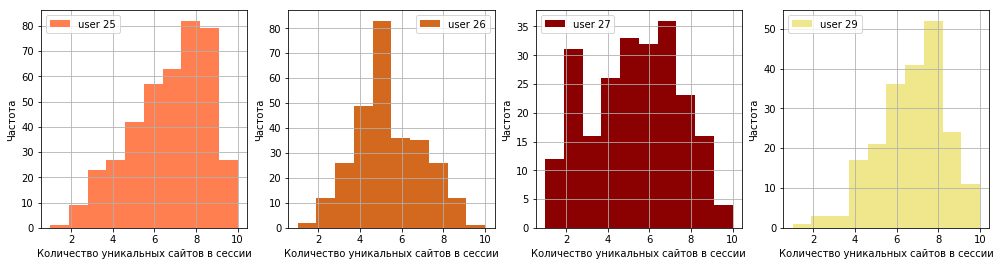

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['unique'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'Количество уникальных сайтов в сессии')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

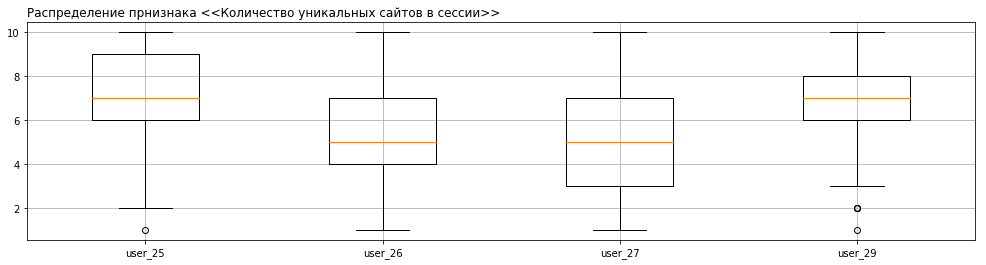

In [35]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'unique'],data_visualisation.loc[data_visualisation.user == 26,'unique'],
               data_visualisation.loc[data_visualisation.user == 27,'unique'],data_visualisation.loc[data_visualisation.user == 29,'unique']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Количество уникальных сайтов в сессии>>', loc = 'left')
pylab.grid()

#### 6. Час начала сессии

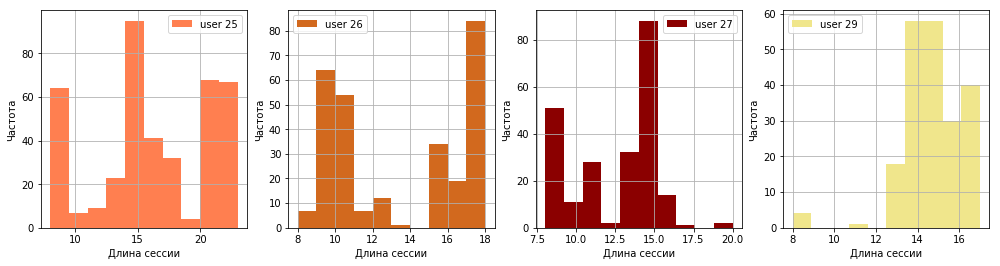

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['hour'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'Длина сессии')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

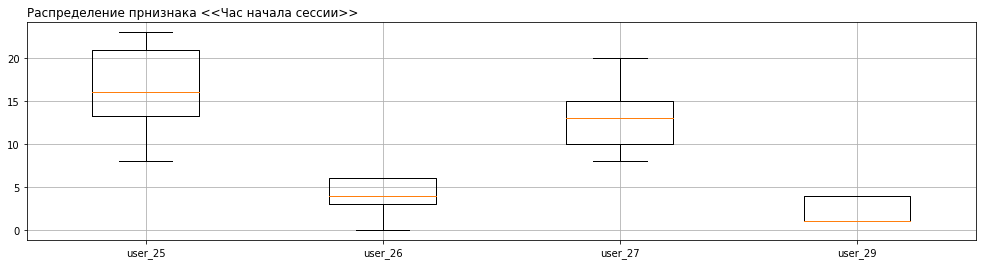

In [37]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'hour'],data_visualisation.loc[data_visualisation.user == 26,'day'],
               data_visualisation.loc[data_visualisation.user == 27,'hour'],data_visualisation.loc[data_visualisation.user == 29,'day']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Час начала сессии>>', loc = 'left')
pylab.grid()

#### 7. Длина сессии

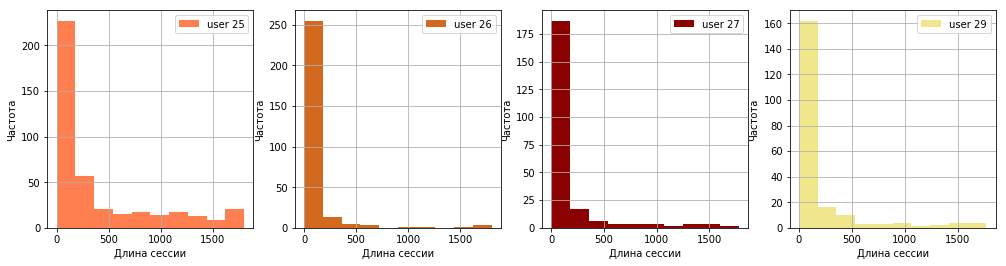

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['max_delta'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'Длина сессии')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

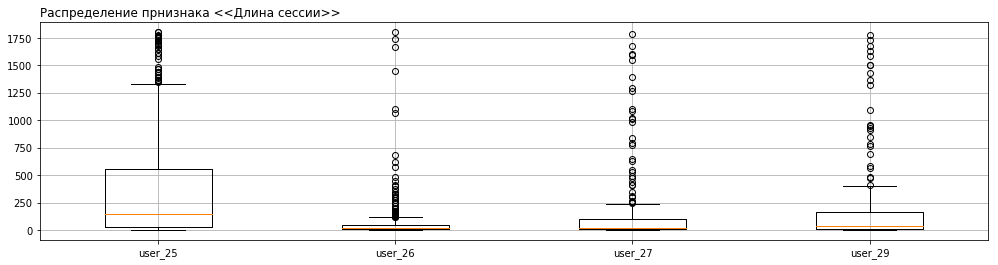

In [39]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'max_delta'],data_visualisation.loc[data_visualisation.user == 26,'max_delta'],
               data_visualisation.loc[data_visualisation.user == 27,'max_delta'],data_visualisation.loc[data_visualisation.user == 29,'max_delta']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Длина сессии>>', loc = 'left')
pylab.grid()

#### 8. Частота использования почты в сессии

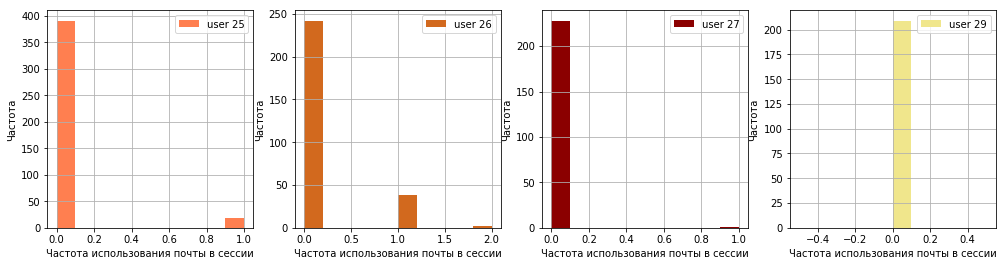

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))
for idx, (user, sub_df) in  enumerate(pd.DataFrame.groupby(data_visualisation, 'user')): 
    plot = axes.flatten()[idx]
    plot.hist(sub_df['mail_fr'], color=colors[user],label = ('user '+str(user)))
    plot.set_xlabel(u'Частота использования почты в сессии')
    plot.set_ylabel(u'Частота')
    plot.grid()
    plot.legend()

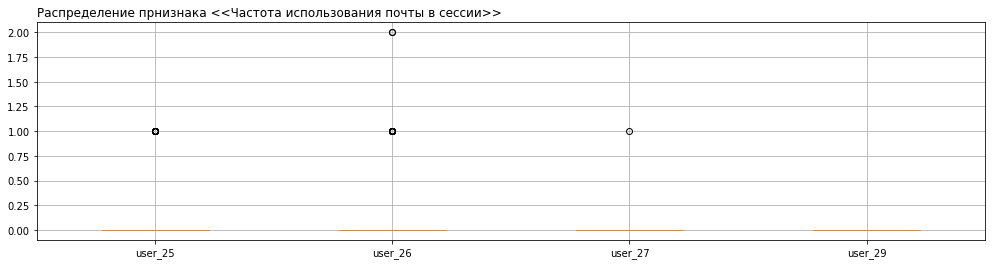

In [41]:
plot = pylab.figure(figsize = (17,4))
labels = ['user_25','user_26','user_27','user_29']
pylab.boxplot((data_visualisation.loc[data_visualisation.user == 25,'mail_fr'],data_visualisation.loc[data_visualisation.user == 26,'mail_fr'],
               data_visualisation.loc[data_visualisation.user == 27,'mail_fr'],data_visualisation.loc[data_visualisation.user == 29,'mail_fr']),
              labels = labels);
pylab.title(u'Распределение прнизнака <<Частота использования почты в сессии>>', loc = 'left')
pylab.grid()

### Выводы:

    1. Признак "max_delta":	Признак слабо коррелирован с целевой переменной. Причиной этому может служить боьшое количество выбросов. Возможно, если убрать выбросы, то показания улучшатся.

    2. Признак "day": День недели не имеет выбросов, имеет относительно большой коэффициент корреляции с целевой переменной. Однако для обучения следует использовать эту переменную в виде .................	

    3. Признак "hour": Час начала сессии имеет мало выбросов и имеет большой коэффициент корреляции с целевой переменной. Дляобучения, возможно, стоит рассматривать как категориальный признак.	

    4. Признак "month": Признак слабо коррелирован с целевой переменной. Причиной этому может служить большое количество выбросов. Возможно, если убрать выбросы, то показания улучшатся.	

    5. Признак "unique": Признак слабо коррелирован с целевой переменной. Причиной этому может служить боьшое количество выбросов. Возможно, если убрать выбросы, то показания улучшатся.

    6. Признак "mail_fr": Признак слабо коррелирован с целевой переменной. На случайных четырех пользователях выглядит абсолютно бесполезным.	

    7. Признак "social": Признак не сильно коррелирован с целевой переменной, что может быть вызвано наличием выброов.

    8. Признак "popular_sites": Признак не сильно коррелирован с целевой переменной, что может быть вызвано наличием выброcов.	

Для улучшения результатов обучения следует убрать выбросы в некоторых признаках, так как они могут сильно снизить эффективность работы классификаторов. Итого, признаки, требующие очистки от выбросов: "max_delta", "month", "unique", "social", "popular_sites". Если коэффициенты корреляции при этом не увеличатся, то признаки будут удалены.

#### Удаление выбросов

На вход функции подается ДатаФрэйм. Функция в цикле проходит по всем признакам и считает 95% доверительный интервал либо используя нормальное распределение, либо распределение стьюдента. На выходе функции получаем список номеров сессий, в которых нет выбросов.

In [42]:
def feauter_cleaning(data,label):
    list_of_indexes = []
    helper = []
    unique = np.unique(label)
    for colum in data.columns:
        one_feauter = []
        for name in unique:
            trigger = stats.shapiro(data.loc[label == name,colum].values)      
            if trigger[1]>0.05 : 
                interval = stats.norm.interval(alpha = 0.9, loc = data.loc[label == name,colum].values.mean(),
                                               scale = np.std(data.loc[label == name,colum].values))
            else:
                interval = stats.t.interval( 0.9,len(data.loc[label == name,colum]),
                                            loc = data.loc[label == name,colum].values.mean(),
                                            scale = np.std(data.loc[label == name,colum].values))
            one_feauter.extend(data[label == name][(data.loc[label == name,colum]>interval[0])&
                                                   (data.loc[label == name,colum]<interval[1])].index)
        
        helper.append(one_feauter)
    print (len(helper)+1)
    list_of_indexes = data.index
    for i in range(0,len(data.columns)):
        print (helper[i])
        list_of_indexes = list(set(helper[i]) & set(list_of_indexes))
    return list_of_indexes

In [43]:
help_feauters = add_feauters[['max_delta', "month", "unique", "social", "popular_sites"]]
answer = feauter_cleaning(help_feauters,y)

C:\Users\Gregory\Anaconda2\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\Gregory\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\Users\Gregory\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc
C:\Users\Gregory\Anaconda2\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\Gregory\Anaconda2\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("In

In [45]:
add_feauters.iloc[answer].head()

,time_delta_1,time_delta_2,time_delta_3,time_delta_4,time_delta_5,time_delta_6,time_delta_7,time_delta_8,time_delta_9,max_delta,...,day5,day6,day7,day,hour,month,unique,mail_fr,social,popular_sites
1,1.0,0.0,0.0,0.0,2.0,0.0,17.0,29.0,1.0,50.0,...,1.0,0.0,0.0,4.0,14.0,4.0,6.0,0.0,0.0,0.0
4,2.0,0.0,1.0,0.0,0.0,91.0,0.0,0.0,1.0,95.0,...,0.0,0.0,0.0,2.0,12.0,11.0,4.0,0.0,0.0,2.0
5,1.0,0.0,8.0,1.0,16.0,10.0,12.0,0.0,0.0,48.0,...,0.0,1.0,0.0,5.0,14.0,1.0,8.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,6.0,8.0,2.0,3.0,0.0,0.0,1.0
10,5.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,...,1.0,0.0,0.0,4.0,17.0,2.0,4.0,0.0,1.0,0.0


#### Анализ корреляции признаков с целевой переменной.

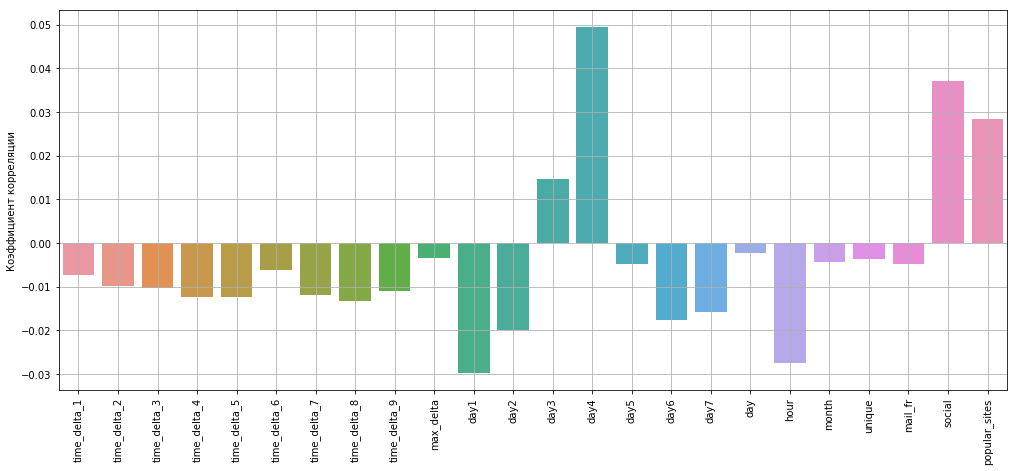

In [46]:
pylab.figure(figsize = (17,7))
add_feauter_corr_2 = add_feauters.iloc[answer].join(pd.DataFrame({'user':y}))
for_plot_2 = add_feauter_corr_2.corr(method = 'spearman').user
sns.barplot(add_feauter_corr_2.columns[:-1],for_plot_2[:-1])
plt.xticks(np.arange(len(for_plot_2.drop('user'))),rotation='vertical');
pylab.ylabel(u'Коэффициент корреляции')
pylab.grid()

OneHotEncoding для признака 'hour':

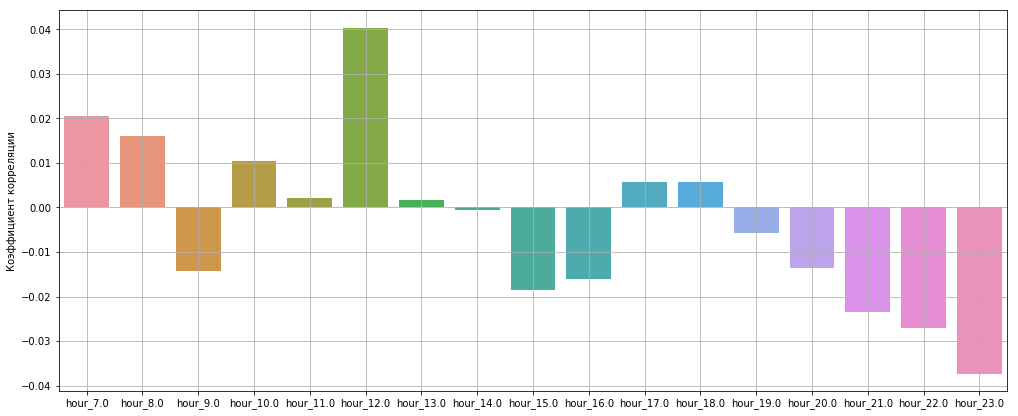

In [47]:
hour = pd.get_dummies(add_feauters.iloc[answer].hour,'hour')
hour = hour.join(pd.DataFrame({'user':y}))
pylab.figure(figsize = (17,7))
for_plot_3 = hour.corr(method = 'spearman').user
sns.barplot(hour.columns[:-1],for_plot_3[:-1])
pylab.ylabel(u'Коэффициент корреляции')
pylab.grid()

OneHotEncoding для признака 'social':

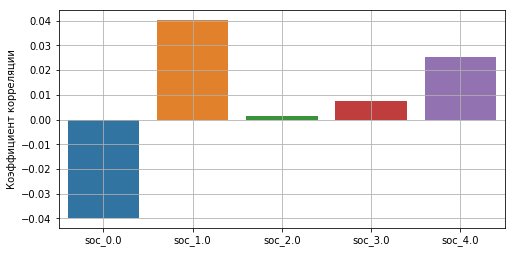

In [48]:
social = pd.get_dummies(add_feauters.iloc[answer].social,'soc')
social = social.join(pd.DataFrame({'user':y}))
pylab.figure(figsize = (8,4))
for_plot_3 = social.corr(method = 'spearman').user
sns.barplot(social.columns[:-1],for_plot_3[:-1])
pylab.ylabel(u'Коэффициент корреляции')
pylab.grid()

OneHotEncoding для признака 'popular_sites':

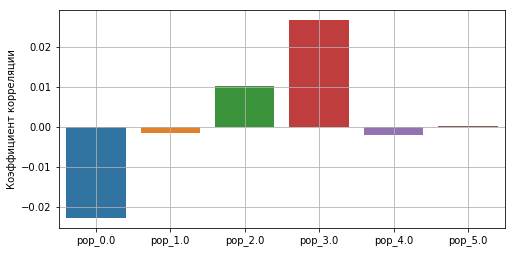

In [49]:
popular_sites = pd.get_dummies(add_feauters.iloc[answer].popular_sites,'pop')
popular_sites = popular_sites.join(pd.DataFrame({'user':y}))
pylab.figure(figsize = (8,4))
for_plot_3 = popular_sites.corr(method = 'spearman').user
sns.barplot(popular_sites.columns[:-1],for_plot_3[:-1])
pylab.ylabel(u'Коэффициент корреляции')
pylab.grid()

In [50]:
unique_2 = np.unique(y[answer])
targets_2 = unique_2[0:20]
ind_target_2 = []
for val in targets_2:
    ind_target_2.extend(np.where(y[answer]==val))
ind_target_2 = np.hstack(ind_target_2)
y_plt_2 = y[answer][ind_target_2]
lab_2 = np.unique(y_plt_2)


In [51]:
day = add_feauters[['day1','day2','day3','day4','day5','day6','day7']]
final_feauters = day.iloc[answer].join(hour.drop('user',axis = 1))
final_feauters = final_feauters.join(social.drop('user',axis = 1))


In [52]:
data_for_plot =  sparse.hstack((X_train_sparse[answer,:],final_feauters), format = "csr")

In [53]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data_for_plot[ind_target_2,:].toarray())

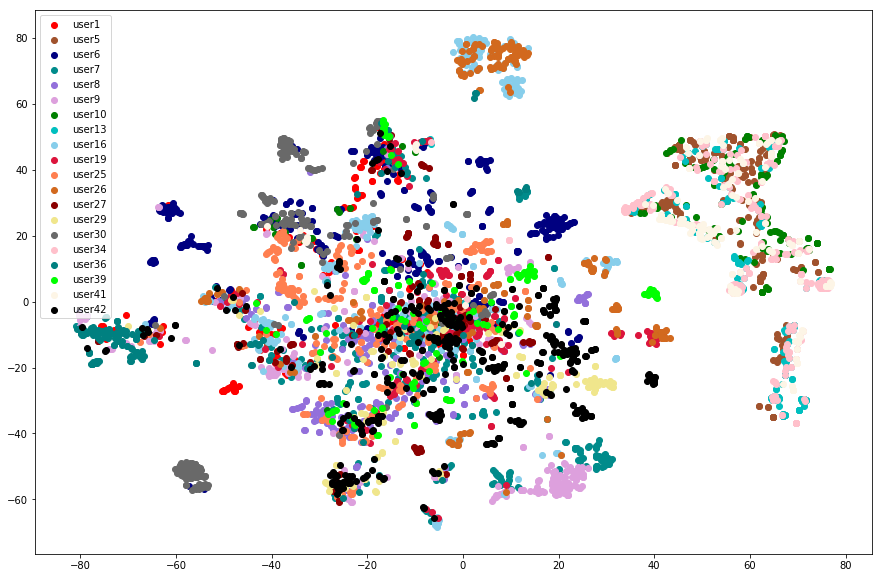

In [54]:
pylab.figure(figsize=(15, 10))
col = 0
for i in lab_2:
    z = np.ones((len(y_plt[y_plt == i]),))*100
    pylab.scatter(data_2d_tsne[y_plt_2 == i, 0], data_2d_tsne[y_plt_2 == i, 1], c = colors[i],label = ('user'+str(i)))
    pylab.legend()


Выводы по главе: после добавления признаков 'hour','social',popular_sites' и  'day', представленных с помощью OneHotEncoding, классы стали визуально более различимыми.

In [55]:
X_data_sparse = sparse.hstack((X_train_sparse[answer,:],final_feauters.values), format = "csr")
labels = y[answer]

# 3. Обучение алгоритмов

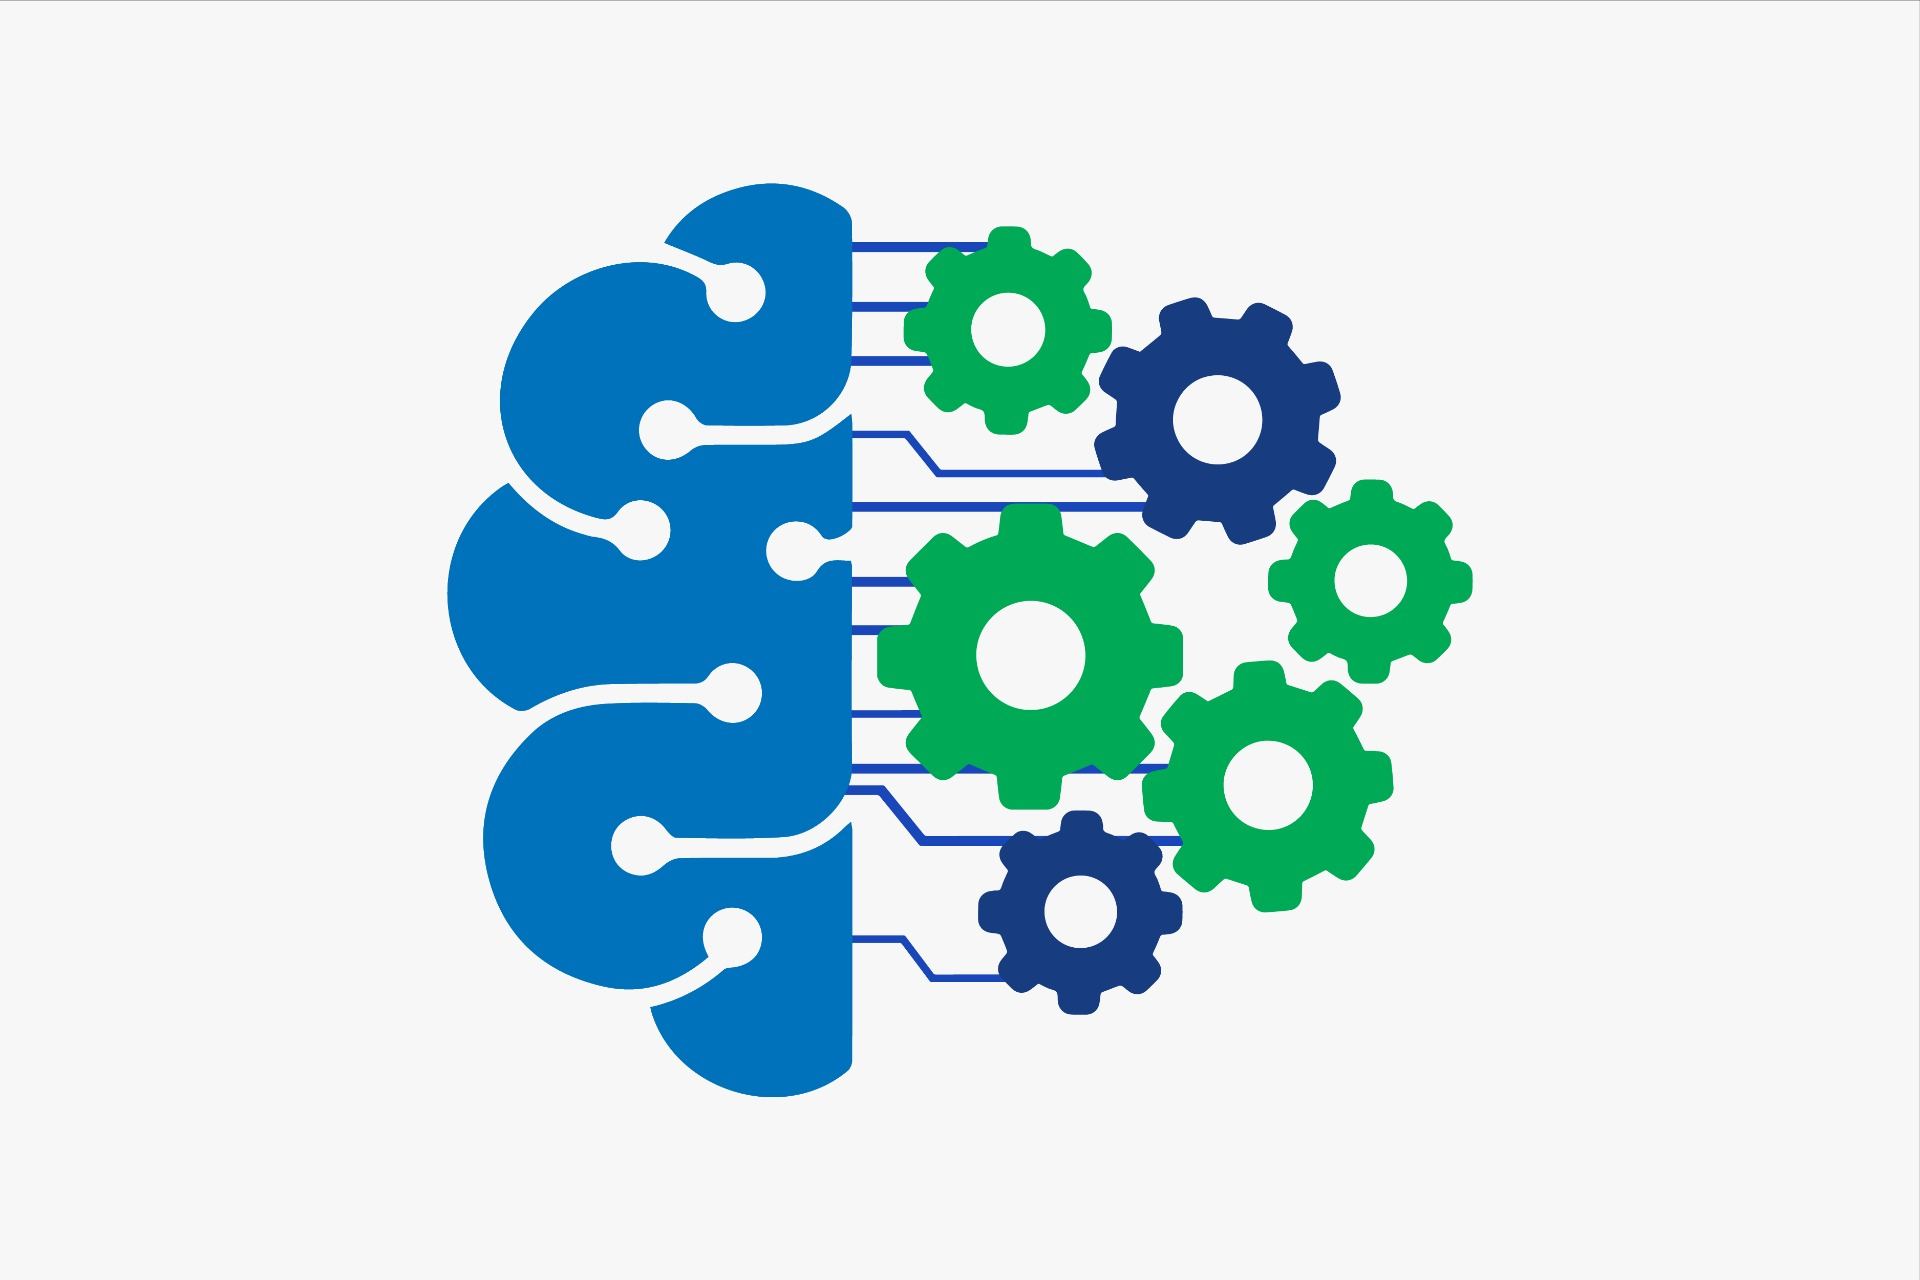

В этой главе будут обучаться алгоритмы на подготовленных ранее данных, а также сравниваться по выбранным метрикам.

### Кросс-валидация

Для начала, разобьем нашу выборку на обучающую и тестовую методами кроссвалидации. Необходимо чтобы в каждой выборке присутствовали элементы всех классов.

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

Данные разобьем на обучающую и тестовую выборки двумя способами:

1. На 3 фолда с помощью метода "StratifiedKFold".
2. На обучающую и отложенную выборки с помощью метода "train_test_split".

In [57]:
skf = StratifiedKFold(n_splits = 3, shuffle=True, random_state=17)

In [58]:
def plot_validation_curves(param_values, grid_cv_results_):
    train_mu, train_std = grid_cv_results_['mean_train_score'], grid_cv_results_['std_train_score']
    valid_mu, valid_std = grid_cv_results_['mean_test_score'], grid_cv_results_['std_test_score']
    train_line = plt.plot(param_values, train_mu, '-', label='train', color='green')
    valid_line = plt.plot(param_values, valid_mu, '-', label='test', color='red')
    plt.fill_between(param_values, train_mu - train_std, train_mu + train_std, edgecolor='none',
                     facecolor=train_line[0].get_color(), alpha=0.2)
    plt.fill_between(param_values, valid_mu - valid_std, valid_mu + valid_std, edgecolor='none',
                     facecolor=valid_line[0].get_color(), alpha=0.2)
    plt.legend()

In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data_sparse,labels,train_size = 0.75,
                                                      random_state = 17,stratify = labels, shuffle = True)

### Обучение алгоритмов

В данной работе будут применяться следующие алгоритмы:

1. Метод опорных векторов.
2. Случайный лес.
3. Стохастический градиентный спуск.
4. Логистическая регрессия.

Коэффициенты алгоритмов будут подбираться на основе поиска по сетке.

In [61]:
from sklearn.model_selection import GridSearchCV

#### Метод опорных векторов

In [62]:
from sklearn.svm import LinearSVC

In [ ]:
svm.

In [63]:
svm = LinearSVC(C=1, random_state = 17)

svm_cs_score = cross_val_score(svm,X_train,y_train,cv = skf).mean()
svm.fit(X_train,y_train)
svm_score = accuracy_score(y_valid, svm.predict(X_valid))
print(u'Оценка на кроссвалидации = %f' % svm_cs_score)
print(u'Оценка точности = %f' % svm_score)

C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Оценка на кроссвалидации = 0.448445
Оценка точности = 0.475248


C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [64]:
%%time
svm_params1 = {'C': np.linspace(1e-4, 1e4, 10)}

svm_grid_searcher1 = GridSearchCV(estimator =svm,param_grid = svm_params1, cv = skf, n_jobs = -1)
svm_grid_searcher1.fit(X_train, y_train)

Wall time: 1h 59min 48s


C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [71]:
Y1  = svm_grid_searcher1.cv_results_['split0_train_score'].max()
Y1_ind  = svm_grid_searcher1.cv_results_['split0_train_score'].argmax()
Y2  = svm_grid_searcher1.cv_results_['split1_train_score'].max()
Y2_ind  = svm_grid_searcher1.cv_results_['split1_train_score'].argmax()
Y3  = svm_grid_searcher1.cv_results_['split2_train_score'].max()
Y3_ind  = svm_grid_searcher1.cv_results_['split2_train_score'].argmax()
svm_grid_searcher1_sc = []

print('svm_grid_searcher1 train_score 1 %d = %f' % (Y1_ind,Y1))
print('svm_grid_searcher1 train_score 2 %d = %f' % (Y2_ind,Y2))
print('svm_grid_searcher1 train_score 3 %d = %f' % (Y3_ind,Y3))

svm_grid_searcher1 train_score 1 1 = 0.654350
svm_grid_searcher1 train_score 2 8 = 0.649020
svm_grid_searcher1 train_score 3 2 = 0.657601


In [72]:
Y1  = svm_grid_searcher1.cv_results_['split0_test_score'].max()
Y1_ind  = svm_grid_searcher1.cv_results_['split0_test_score'].argmax()
Y2  = svm_grid_searcher1.cv_results_['split1_test_score'].max()
Y2_ind  = svm_grid_searcher1.cv_results_['split1_test_score'].argmax()
Y3  = svm_grid_searcher1.cv_results_['split2_test_score'].max()
Y3_ind  = svm_grid_searcher1.cv_results_['split2_test_score'].argmax()
svm_grid_searcher1_sc = []

print('svm_grid_searcher1 test_score 1 %d = %f' % (Y1_ind,Y1))
print('svm_grid_searcher1 test_score 2 %d = %f' % (Y2_ind,Y2))
print('svm_grid_searcher1 test_score 3 %d = %f' % (Y3_ind,Y3))

svm_grid_searcher1 test_score 1 1 = 0.335551
svm_grid_searcher1 test_score 2 7 = 0.331462
svm_grid_searcher1 test_score 3 2 = 0.337283


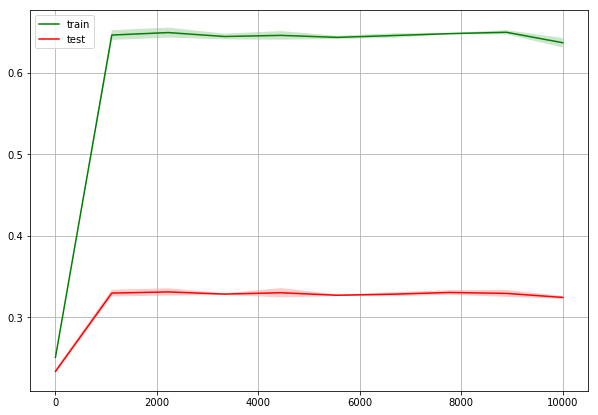

In [68]:
pylab.figure(figsize = (10,7))
pylab.grid()
plot_validation_curves(svm_params1['C'], svm_grid_searcher1.cv_results_)

#### Случайный лес

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model_rf = RandomForestClassifier(n_jobs = -1, random_state = 17)
cross_val_score_rf = cross_val_score(model_rf,X_data_sparse,labels,cv = skf, n_jobs = -1)

In [122]:
model_rf.fit(X_train,y_train)
accuracy_rf = accuracy_score(y_valid,model_rf.predict(X_valid))

C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
print ('Точность равна : %f' % accuracy_rf)

Точность равна : 0.445576


In [126]:
print ('cross_val_score для Случайного Леса: %f' % cross_val_score_rf.mean())

cross_val_score для Случайного Леса: 0.434767


#### Стохастический градиентный спуск

In [79]:
from sklearn.linear_model import SGDClassifier

In [85]:
model_SGD = SGDClassifier(penalty = 'l2', max_iter = 9, random_state = 17,n_jobs = -1)
cross_val_score_h1 = cross_val_score(model_SGD,X_data_sparse,labels,cv = skf, n_jobs = -1)

model_SGD.fit(X_train,y_train)
SGD_score = accuracy_score(y_valid, model_SGD.predict(X_valid))
print(u'Оценка на кроссвалидации = %f' % cross_val_score_h1.mean())
print(u'Оценка точности = %f' % SGD_score)

Оценка на кроссвалидации = 0.417329
Оценка точности = 0.423756


In [110]:
param_grid_SGD = {'alpha' : np.logspace(-6,-3,15)}

In [111]:
%%time
sgd_logit_p_1 = SGDClassifier(penalty = 'l2', max_iter = 12, random_state = 17,n_jobs = -1 )
sgd_grid_searcher = GridSearchCV(estimator =sgd_logit_p_1,param_grid = param_grid_SGD, n_jobs = -1)
sgd_grid_searcher.fit(X_train,y_train)


Wall time: 13min 44s


In [112]:
Y1_SGD = sgd_grid_searcher.cv_results_['split0_train_score'].max()
Y1_ind_SGD = sgd_grid_searcher.cv_results_['split0_train_score'].argmax()
Y2_SGD = sgd_grid_searcher.cv_results_['split1_train_score'].max()
Y2_ind_SGD = sgd_grid_searcher.cv_results_['split1_train_score'].argmax()
Y3_SGD = sgd_grid_searcher.cv_results_['split2_train_score'].max()
Y3_ind_SGD = sgd_grid_searcher.cv_results_['split2_train_score'].argmax()
svm_grid_searcher1_sc = []

print('grid_search_RF 1 %d = %f' % (Y1_ind_SGD,Y1_SGD))
print('grid_search_RF 2 %d = %f' % (Y2_ind_SGD,Y2_SGD))
print('grid_search_RF 3 %d = %f' % (Y3_ind_SGD,Y3_SGD))

grid_search_RF 1 8 = 0.571221
grid_search_RF 2 8 = 0.575208
grid_search_RF 3 7 = 0.577424


In [113]:
Y1  = sgd_grid_searcher.cv_results_['split0_test_score'].max()
Y1_ind  = sgd_grid_searcher.cv_results_['split0_test_score'].argmax()
Y2  = sgd_grid_searcher.cv_results_['split1_test_score'].max()
Y2_ind  = sgd_grid_searcher.cv_results_['split1_test_score'].argmax()
Y3  = sgd_grid_searcher.cv_results_['split2_test_score'].max()
Y3_ind  = sgd_grid_searcher.cv_results_['split2_test_score'].argmax()
svm_grid_searcher1_sc = []

print('svm_grid_searcher1 test_score 1 %d = %f' % (Y1_ind,Y1))
print('svm_grid_searcher1 test_score 2 %d = %f' % (Y2_ind,Y2))
print('svm_grid_searcher1 test_score 3 %d = %f' % (Y3_ind,Y3))

svm_grid_searcher1 test_score 1 9 = 0.405599
svm_grid_searcher1 test_score 2 10 = 0.408099
svm_grid_searcher1 test_score 3 8 = 0.411062


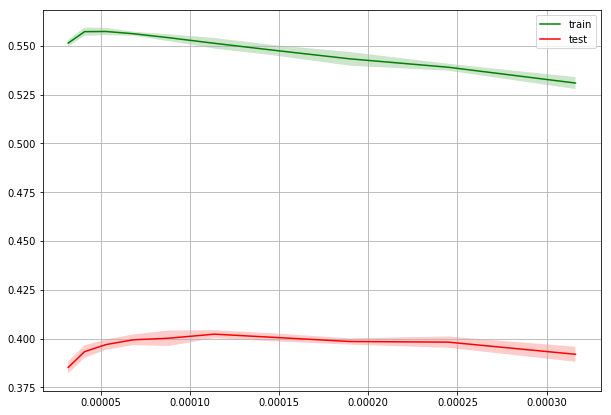

In [105]:
pylab.figure(figsize = (10,7))
pylab.grid()
plot_validation_curves(param_grid_SGD['alpha'], sgd_grid_searcher.cv_results_)

In [ ]:
logit.

In [114]:
from sklearn.linear_model import LogisticRegression

In [116]:
logit = LogisticRegression(penalty = 'l2',random_state = 17, n_jobs = -1)

In [117]:
cvs_3 = cross_val_score(logit,X_train,y_train,cv = skf).mean()

logit.fit(X_train,y_train)
as_3 = accuracy_score(y_valid,logit.predict(X_valid))

print('cross_val_score of Logistic_regression = %f' % round(cvs_3,3))
print('accuracy on Logistic_regression = %f' % round(as_3,3))

C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Gregory\Anaconda2\lib\site-packages\sklearn\linear_model\l

cross_val_score of Logistic_regression = 0.468000
accuracy on Logistic_regression = 0.492000


#### Сравнение работы классификаторов

In [129]:
result = {'SVM':svm_cs_score,
         'SVM_GS':svm_grid_searcher1.cv_results_['split2_test_score'].max(),
         'Random_forest': cross_val_score_rf.mean(),
         'SGD':cross_val_score_h1.mean(),
         'SGD_GS': sgd_grid_searcher.cv_results_['split2_test_score'].max(),
         'LR': cvs_3}

#### Сравнение средних значений оценки на кросс валидации.

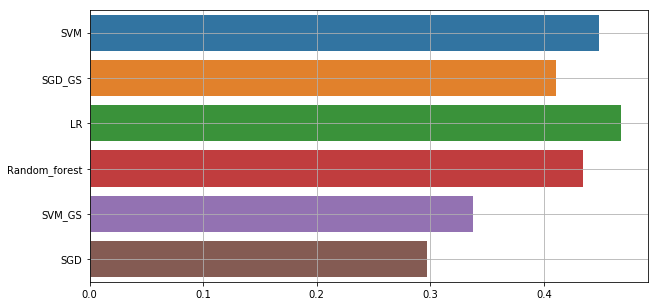

In [132]:
pylab.figure(figsize = (10,5))
sns.barplot(result.values() ,result.keys());
pylab.grid()

#### Выводы.

Наилучшей моделью оказалась логистическая регрессия с добавленными признаками 'hour','social',popular_sites' и 'day', представленных с помощью OneHotEncoding. Также внимания заслуживают алгоритмы SVM и Random Forest, которые можно более точно настроить, имея большие мощности.

Данная работа выполняет важную задачу идентификации пользователя в сети по его действиям, которая может применяться для идентификации взломщиков, если использовать бинарную классификацию (один против всех), определения анонимных страниц, устанавливая связь между фейковым аккаунтом и настоящим аккаунтом пользователя и т.д. Также выводы из данной работы могут применяться в других областях, например, для обнаружения аномальных действий клиента банка, что может помочь выявить украденную кредитную карту и своевременно ее заблокировать.